In [1]:
# import libraries
import numpy as np
import pandas as pd
import os
import glob
import re
import matplotlib.pyplot as plt
import seaborn as sns
import re

from pathlib import Path

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# load in directories
from experiment_code.constants import Defaults

In [2]:
# load in data from gorilla
df = pd.read_csv(os.path.join(Defaults.RAW_DIR, "gorilla_v3.csv"))


In [3]:
# filter dataframe to remove redundant cols
df_filtered = df.filter({'Experiment ID', 'Experiment Version', 'Task Version', 'Participant Private ID',
           'counterbalance-mpke', 'Spreadsheet Row', 'Zone Type', 
           'Reaction Time', 'Response', 'display', 'iti_dur_ms', 
           'trial_dur_ms', 'V1', 'V2', 'V2', 'V3', 'V4', 'V5',
          'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12'})

In [4]:
# clean spreadsheet
df_filtered = df_filtered.rename({'Zone Type':'Zone_Type'}, axis=1)
df_filtered = df_filtered.rename({'Participant Private ID':'Participant_Private_ID'}, axis=1)
df_filtered.columns

Index(['Spreadsheet Row', 'Zone_Type', 'trial_dur_ms', 'V5', 'V7', 'V6',
       'display', 'Task Version', 'Reaction Time', 'V9', 'V12',
       'counterbalance-mpke', 'V4', 'V8', 'Participant_Private_ID', 'V3',
       'Experiment ID', 'V1', 'Experiment Version', 'Response', 'iti_dur_ms',
       'V2', 'V10', 'V11'],
      dtype='object')

In [5]:
# select response-only rows and re-index
df_filtered = df_filtered.query('Zone_Type=="response_rating_scale_likert"')
df_filtered = df_filtered.reset_index()
del df_filtered['index']

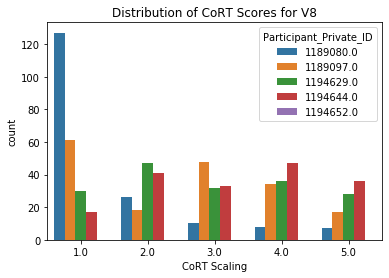

In [8]:
#Investigate Outlier in V8
df_filtered_V8 = df_filtered.loc[df_filtered['counterbalance-mpke'] == "V8"]
df_filtered_V8.Participant_Private_ID.unique()

sns.countplot(x='Response', hue='Participant_Private_ID', data= df_filtered_V8)
plt.xlabel('CoRT Scaling')
plt.title('Distribution of CoRT Scores for V8');

In [9]:
#Drop Outlier in V8
df_where_outlier = df_filtered[df_filtered.Participant_Private_ID == 1189080.0]
print(df_where_outlier.index)
df_filtered = df_filtered.drop(df_filtered.index[0:178])
df_filtered

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            168, 169, 170, 171, 172, 173, 174, 175, 176, 177],
           dtype='int64', length=178)


,Spreadsheet Row,Zone_Type,trial_dur_ms,V5,V7,V6,display,Task Version,Reaction Time,V9,...,Participant_Private_ID,V3,Experiment ID,V1,Experiment Version,Response,iti_dur_ms,V2,V10,V11
178,2.0,response_rating_scale_likert,10000.0,His brand new soccer ball had landed in the mud,The farmer used the extra corn he had as feed,"While in the city, Amanda didn't feel safe",trial,19.0,9993.326,Some of the kids thought the professor wasn't ...,...,1189081.0,"Every morning, Liz would carefully brush her hair",13726.0,He hated bees and feared encountering a hive,10.0,1.0,500.0,Amber missed the bus even though she yelled stop,The business owner was scared that his busines...,Abby stuck his picture to her wall with a tack
179,3.0,response_rating_scale_likert,10000.0,The hiker's new boots were stuck in the deep mud,The worried mother had many mouths to feed,"At the hotel, Kevin kept his valuables in the ...",trial,19.0,9993.388,Derek planned to lift weights every day to get...,...,1189081.0,The young girl told her mom she wanted longer ...,13726.0,Above the treehouse were the bees made their hive,10.0,2.0,500.0,A village was discovered between the mountains...,Nina had no confidence and always expected to ...,Frankie had four plants getting sunned on the ...
180,4.0,response_rating_scale_likert,10000.0,"Distracted while driving, Maya got stuck in th...",Andrea watered her garden with a small hose,The skyscraper was demolished because it wasn'...,trial,19.0,9993.350,Albert lived in a thatched hut that he built,...,1189081.0,The sloppy boy was too lazy to cut his hair,13726.0,"After collecting the pollen, the bee returned ...",10.0,4.0,500.0,"From the mountaintop, Wyatt could see the whol...",Some people are overconfident and claim they n...,"After the rain stopped, Caroline played outsid..."
181,5.0,response_rating_scale_likert,10000.0,The farm worker collected fresh eggs from the ...,Fred only criticized Larry to make him feel bad,The robber ordered the bank teller to open the...,trial,19.0,9993.310,"After seeing the bill, Ruth forgot to pay",...,1189081.0,"Tucker has no filter, and says whatever enters...",13726.0,There were hundreds of bees buzzing around the...,10.0,3.0,500.0,The mountaineer spotted a small town in the op...,"When Sheldon is upset, others can hear his tee...",The minor damage to their car was from hail
182,6.0,response_rating_scale_likert,10000.0,The mother went to the preschool to pick up he...,The healthorganic,Holly put her most expensive jewelry in the safe,trial,19.0,9993.305,"After canoeing all day, May's arms were tired",...,1189081.0,Greg's dentist was very impressed by his teeth,13726.0,The buzzing noise turned out to be from a bee,10.0,2.0,500.0,"When the rain started, the hikers ran into a cave",Paul disliked summer because of the humidity a...,His mother cautioned him about letting the ban...
183,7.0,response_rating_scale_likert,10000.0,"Though gruff to his friends, Hank wasn't to hi...",Growing up with three brothers made Maddy tough,"Terry wanted to skip school, but she wouldn't ...",trial,19.0,9993.292,She had worked out that day and was very tired,...,1189081.0,The neighbor's dog was scary because of its teeth,13726.0,The infant cried when she got stung by a bee,10.0,1.0,500.0,The lucky explorers discovered diamonds in the...,The man said he fainted because of the heat,Terry told Jay the old fruit had begun to rot
184,8.0,response_rating_scale_likert,10000.0,Her father said the most important people are ...,She grew up with five brothers so she's pretty...,You should always read it over before signing ...,trial,19.0,9993.221,The dog napped on the carpet because it was tired,...,1189081.0,The tiger had punctured the ball with its teeth,13726.0,The boy screamed after he was stung by a bee,10.0,1.0,500.0,"During the winter, the bear slept in its cave",Her grandmother told her she was sweet as a pie,The green fuzz indicated the food had started ...
185,9.0,response_rating_scale_likert,10000.0,"The farmer, whil

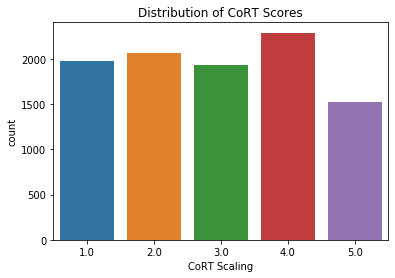

In [10]:
# Visualize distribution of responses overall
sns.countplot(x='Response', data=df_filtered)
plt.xlabel('CoRT Scaling')
plt.title('Distribution of CoRT Scores');

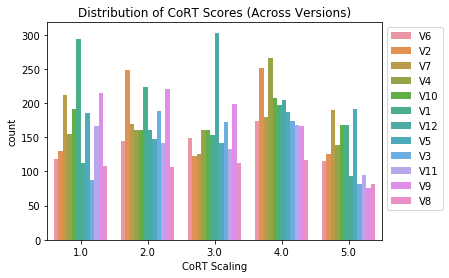

In [11]:
# Visualize distribution of responses per participant
ax = sns.countplot(x='Response', hue='counterbalance-mpke', data=df_filtered)
ax.legend(loc='best', bbox_to_anchor=(1,1))
plt.xlabel('CoRT Scaling')
plt.title('Distribution of CoRT Scores (Across Versions)');